CRICKET BOWLERS PERFORMANCE PREDICTION

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from seaborn import heatmap
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
file_path = '/content/test_Bowling_Card.csv'
uploaded_data = pd.read_csv(file_path)
print("Dataset loaded successfully. Here are the first few rows:")
print(uploaded_data.head())

Dataset loaded successfully. Here are the first few rows:
   Match ID  innings      team opposition  bowler id  overs  balls  maidens  \
0   1198242        1   England   Pakistan      10829   27.0    162        5   
1   1198242        1   England   Pakistan      48440   27.2    164        9   
2   1198242        1   England   Pakistan      72103   18.0    108        3   
3   1198242        1   England   Pakistan      49496   19.0    114        3   
4   1198242        2  Pakistan    England      95855   10.0     60        3   

   conceded  wickets  economy   dots  fours  sixes  wides  noballs  
0        60        3     2.22  132.0    7.0    0.0      0        1  
1        56        4     2.04  135.0    5.0    0.0      0        0  
2        44        1     2.44   82.0    3.0    0.0      0        0  
3        55        1     2.89   86.0    5.0    0.0      1        0  
4        25        1     2.50   51.0    2.0    0.0      1        1  


In [5]:
print("\nConverting categorical columns 'team' and 'opposition' to numeric codes.")
uploaded_data['team'] = uploaded_data['team'].astype('category').cat.codes
uploaded_data['opposition'] = uploaded_data['opposition'].astype('category').cat.codes


Converting categorical columns 'team' and 'opposition' to numeric codes.


In [6]:
numerical_columns = ['overs', 'balls', 'maidens', 'conceded', 'economy', 'dots', 'fours', 'sixes', 'wides', 'noballs']
print(f"\nFilling missing values in columns: {numerical_columns}")
for col in numerical_columns:
    uploaded_data[col].fillna(uploaded_data[col].median(), inplace=True)
    print(f"Filled missing values in '{col}' with median value.")


Filling missing values in columns: ['overs', 'balls', 'maidens', 'conceded', 'economy', 'dots', 'fours', 'sixes', 'wides', 'noballs']
Filled missing values in 'overs' with median value.
Filled missing values in 'balls' with median value.
Filled missing values in 'maidens' with median value.
Filled missing values in 'conceded' with median value.
Filled missing values in 'economy' with median value.
Filled missing values in 'dots' with median value.
Filled missing values in 'fours' with median value.
Filled missing values in 'sixes' with median value.
Filled missing values in 'wides' with median value.
Filled missing values in 'noballs' with median value.


<ipython-input-6-f0daa521beae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uploaded_data[col].fillna(uploaded_data[col].median(), inplace=True)


In [7]:
print("\nData after cleaning and preparation:")
print(uploaded_data.describe())


Data after cleaning and preparation:
           Match ID       innings          team    opposition      bowler id  \
count  4.912000e+04  49120.000000  49120.000000  49120.000000   49120.000000   
mean   2.902332e+05      2.324654      5.786991      5.801832   14432.979235   
std    3.990802e+05      1.060573      3.588093      3.563191   22843.211083   
min    6.238700e+04      1.000000      0.000000      0.000000       2.000000   
25%    6.302000e+04      1.000000      3.000000      3.000000    1219.000000   
50%    6.366800e+04      2.000000      5.000000      5.000000    1951.000000   
75%    3.787500e+05      3.000000      9.000000      9.000000   10829.000000   
max    1.419831e+06      4.000000     12.000000     12.000000  114592.000000   

              overs         balls       maidens      conceded       wickets  \
count  49120.000000  49120.000000  49120.000000  49120.000000  49120.000000   
mean      17.366354    105.962602      4.039577     49.038681      1.546112   
std 

In [8]:
X = uploaded_data[['team', 'opposition', 'overs', 'balls', 'maidens', 'conceded', 'economy', 'dots', 'fours', 'sixes', 'wides', 'noballs']]
y = uploaded_data['wickets']
print("\nFeatures and target variable defined. Sample of features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())


Features and target variable defined. Sample of features (X):
   team  opposition  overs  balls  maidens  conceded  economy   dots  fours  \
0     3           8   27.0    162        5        60     2.22  132.0    7.0   
1     3           8   27.2    164        9        56     2.04  135.0    5.0   
2     3           8   18.0    108        3        44     2.44   82.0    3.0   
3     3           8   19.0    114        3        55     2.89   86.0    5.0   
4     8           3   10.0     60        3        25     2.50   51.0    2.0   

   sixes  wides  noballs  
0    0.0      0        1  
1    0.0      0        0  
2    0.0      0        0  
3    0.0      1        0  
4    0.0      1        1  

Target variable (y):
0    3
1    4
2    1
3    1
4    1
Name: wickets, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Data split into training and testing sets.
Training set size: (39296, 12)
Testing set size: (9824, 12)


In [10]:
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
print("\nTraining the Decision Tree Regressor model for bowler...")
tree.fit(X_train, y_train)
print("Model training complete.")


Training the Decision Tree Regressor model for bowler...
Model training complete.


In [11]:
print("\nPredicting on the test set...")
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Predicting on the test set...


In [12]:
print("\nModel Performance for Bowler Prediction:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)


Model Performance for Bowler Prediction:
Mean Squared Error (MSE): 1.8975331521077905
R-squared (R2 Score): 0.27417382937422585



Plotting feature importances for bowler prediction...


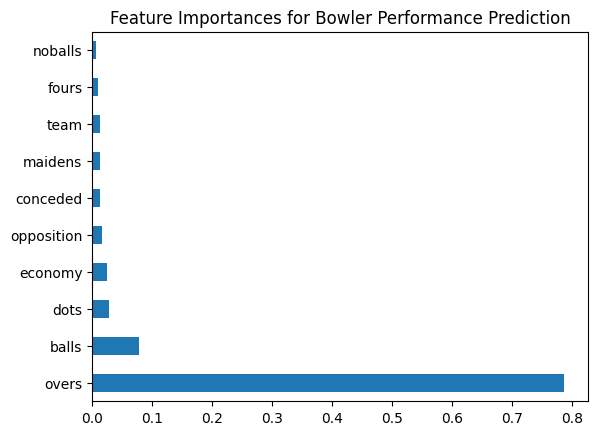

In [13]:
print("\nPlotting feature importances for bowler prediction...")
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances for Bowler Performance Prediction")
plt.show()

In [14]:
comp = {}

In [15]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Support Vector": SVR()
}

In [18]:
from sklearn.exceptions import ConvergenceWarning
import warnings
import time

warnings.filterwarnings("ignore", category=ConvergenceWarning)

comp = {}  # Dictionary to store model scores
timeout_limit = 60  # Time limit in seconds for each model

for model_name, model in models.items():
    start_time = time.time()
    try:
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)  # Train the model
        score = model.score(X_test, y_test)  # Evaluate the model
        comp[model_name] = score  # Save the score
        print(f"{model_name} Regressor score: {score}")
    except KeyboardInterrupt:
        print(f"Training {model_name} interrupted.")
        break
    except Exception as e:
        print(f"Error with {model_name}: {e}")
    finally:
        elapsed_time = time.time() - start_time
        if elapsed_time > timeout_limit:
            print(f"{model_name} training exceeded time limit ({timeout_limit}s).")


Training Decision Tree...
Decision Tree Regressor score: -0.36608037013248595
Training K-Neighbors...
K-Neighbors Regressor score: 0.1691581246779874
Training XGBoost...
XGBoost Regressor score: 0.3145316243171692
Training Random Forest...
Random Forest Regressor score: 0.2926357670348778
Training Linear Regression...
Linear Regression Regressor score: 0.2557562976086839
Training Support Vector...
Support Vector Regressor score: 0.26620416531561575
Support Vector training exceeded time limit (60s).


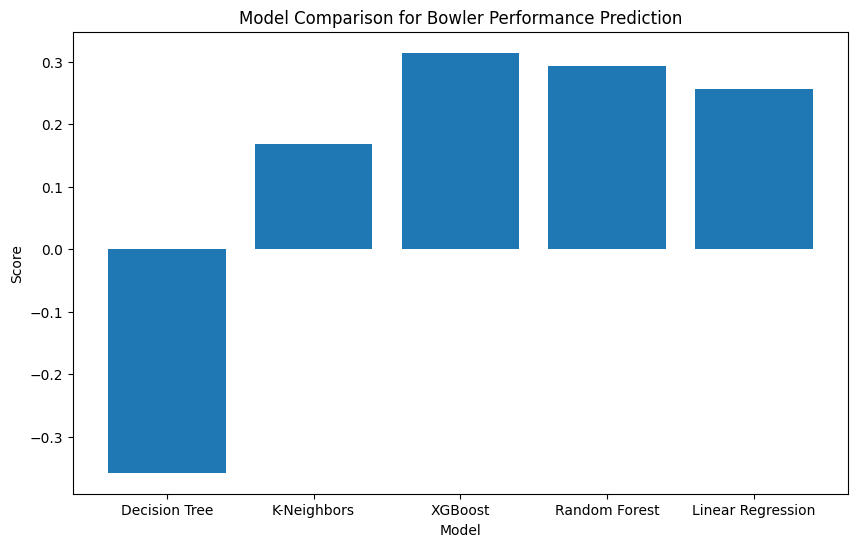

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(comp.keys(), comp.values())
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Comparison for Bowler Performance Prediction")
plt.show()

In [19]:
player = input('Enter bowler name: ')
opposition = input('Enter opposition team: ')
overs = float(input('Enter overs bowled: '))
balls = float(input('Enter balls bowled: '))

Enter bowler name: ravichandra Ashwin
Enter opposition team: England
Enter overs bowled: 30
Enter balls bowled: 168


In [20]:
tree.fit(X_train, y_train)
prediction = tree.predict([[1, 1, overs, balls, 0, 0, 0, 0, 0, 0, 0, 0]])
print(f"{player}'s predicted wickets against {opposition}: {int(prediction[0])}")

ravichandra Ashwin's predicted wickets against England: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [21]:
print("Tree model score on test set:", tree.score(X_test, y_test))

Tree model score on test set: 0.27417382937422585
